In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
data = np.load("processes_res_data.npy")

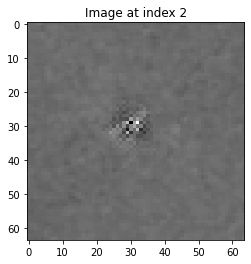

In [3]:
image_array = data
# Choose an index to display a specific image from the array
index_to_display = 2  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

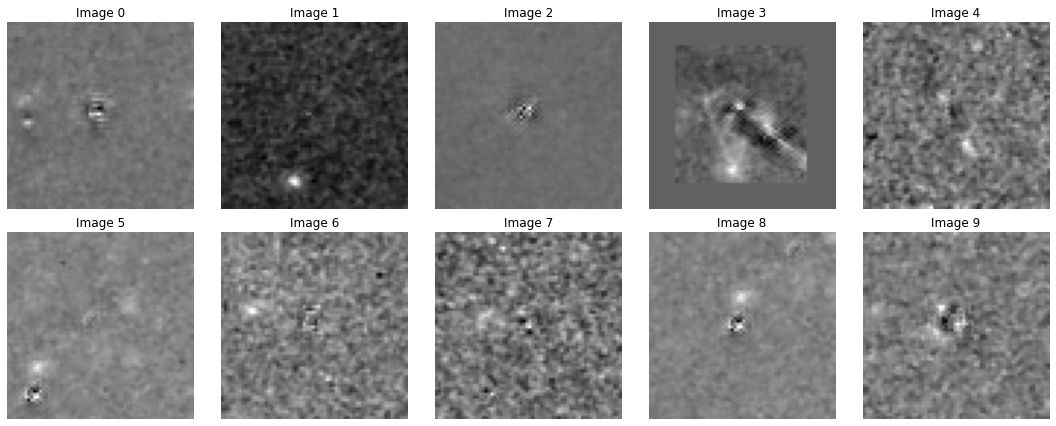

In [4]:
# Number of images to display
num_images_to_display = 10  

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the images and display them
for i in range(num_images_to_display):
    ax = axes[i // 5, i % 5]  # Determine the position in the grid
    ax.imshow(image_array[i], cmap='gray')  # Assuming grayscale, change cmap if necessary
    ax.set_title(f"Image {i}")
    ax.axis('off')  # Hide axes for a cleaner look

# Adjust the layout and display the images
plt.tight_layout()
plt.show()

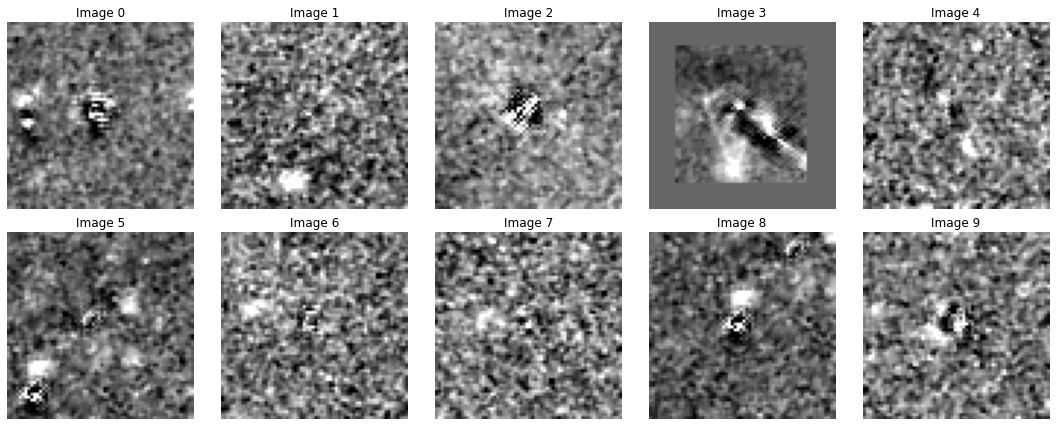

In [5]:
# Assuming image_array is assigned to data
image_array = data  

# Function to normalize and filter individual images
def normalize_image(image):
    normalized_image = deepcopy(image)

    # Apply normalization steps
    low_percentile = np.percentile(normalized_image, 1)
    high_percentile = np.percentile(normalized_image, 99)
    
    # Clip values to the 1st and 99th percentiles
    normalized_image[normalized_image <= low_percentile] = low_percentile
    normalized_image[normalized_image >= high_percentile] = high_percentile

    # Shift the image so that the minimum is 0
    normalized_image -= np.min(normalized_image)

    # Scale the image to the range [0, 1]
    normalized_image /= np.sum(normalized_image)
    normalized_image /= np.max(normalized_image)
    
    return normalized_image

# Function to plot images within the specified index range
def plot_images(start_index, end_index):
    # Apply normalization to each image in the specified range
    normalized_image_array = np.array([normalize_image(image) for image in image_array[start_index:end_index + 1]])

    # Number of images to display
    num_images_to_display = len(normalized_image_array)

    # Create a figure with subplots
    rows = (num_images_to_display + 4) // 5  # Calculate number of rows needed
    fig, axes = plt.subplots(rows, 5, figsize=(15, 6))

    # Loop through the specified indexes and display the corresponding images
    for i in range(num_images_to_display):
        row, col = divmod(i, 5)
        ax = axes[row, col] if rows > 1 else axes[col]  # Handle case when there's only one row
        ax.imshow(normalized_image_array[i], cmap='gray', vmax=1, vmin=0)  # Adjusting vmin and vmax to cover the full range
        ax.set_title(f"Image {i + start_index}")
        ax.axis('off')  # Hide axes for a cleaner look

    # Hide any unused subplots
    for j in range(num_images_to_display, rows * 5):
        row, col = divmod(j, 5)
        if rows > 1:
            fig.delaxes(axes[row, col])
        else:
            fig.delaxes(axes[col])

    # Adjust the layout and display the images
    plt.tight_layout()
    plt.show()

# Example usage: Plot images from index 0 to index 9
start_index = 0
end_index = 9
plot_images(start_index, end_index)


In [7]:
# Apply normalization to the entire dataset
normalized_image_array = np.array([normalize_image(image) for image in image_array])

In [8]:
image_array = normalized_image_array

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.46210757
Median: 0.4536841
Standard Deviation: 0.19183797
Minimum Value: 0.0
Maximum Value: 1.0


In [9]:
# Apply normalization to the entire dataset
normalized_image_array = np.array([normalize_image(image) for image in image_array])

(array([ 72.,  54.,  70.,  84., 129., 199., 209., 212., 275., 315., 323.,
        309., 305., 277., 298., 201., 207., 135., 102.,  90.,  61.,  61.,
         32.,  22.,  54.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1363231a9d0>])

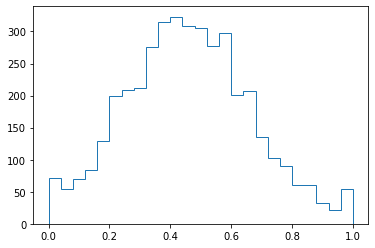

In [10]:
plt.hist(normalized_image_array[1].flat, bins=25, histtype='step')

(array([6.000e+00, 4.700e+01, 2.260e+02, 6.530e+02, 1.070e+03, 1.071e+03,
        6.500e+02, 2.650e+02, 7.300e+01, 1.300e+01, 4.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00]),
 array([-0.01594645, -0.01287381, -0.00980117, -0.00672852, -0.00365588,
        -0.00058324,  0.0024894 ,  0.00556205,  0.00863469,  0.01170733,
         0.01477997,  0.01785262,  0.02092526,  0.0239979 ,  0.02707054,
         0.03014318,  0.03321583,  0.03628847,  0.03936111,  0.04243375,
         0.0455064 ,  0.04857904,  0.05165168,  0.05472432,  0.05779697,
         0.06086961], dtype=float32),
 [<matplotlib.patches.Polygon at 0x13631f72340>])

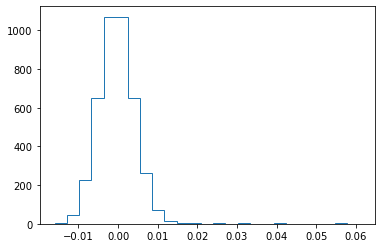

In [11]:
plt.hist(data[1].flat, bins=25, histtype='step')

In [11]:
np.save("norm-res-95.npy",normalized_image_array)

In [12]:
normalized_image_array.shape

(10046, 64, 64)

In [13]:
image_array = normalized_image_array

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.4621201
Median: 0.45369354
Standard Deviation: 0.19188246
Minimum Value: 0.0
Maximum Value: 1.0


In [14]:
image_array = data

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.00056683994
Median: -4.0984072e-05
Standard Deviation: 1.0885805
Minimum Value: -2899.882
Maximum Value: 2037.0825


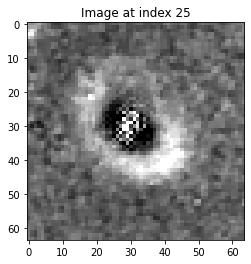

In [19]:
image_array = normalized_image_array
# Choose an index to display a specific image from the array
index_to_display = 25  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

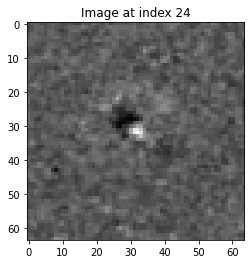

In [16]:
image_array = data
# Choose an index to display a specific image from the array
index_to_display = 24  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

(array([ 60.,  23.,  39.,  69.,  91., 156., 207., 242., 318., 343., 339.,
        389., 335., 339., 272., 238., 173., 136.,  98.,  68.,  43.,  33.,
         17.,  19.,  49.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1363dae8b50>])

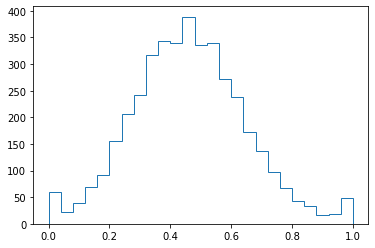

In [17]:
plt.hist(normalized_image_array[24].flat, bins=25, histtype='step')

(array([6.000e+00, 7.000e+00, 3.000e+00, 7.000e+00, 1.000e+01, 6.500e+01,
        2.810e+02, 7.830e+02, 1.156e+03, 9.740e+02, 5.370e+02, 1.770e+02,
        5.000e+01, 2.300e+01, 4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00]),
 array([-0.0297787 , -0.02638228, -0.02298586, -0.01958944, -0.01619302,
        -0.0127966 , -0.00940018, -0.00600376, -0.00260734,  0.00078908,
         0.0041855 ,  0.00758192,  0.01097834,  0.01437476,  0.01777118,
         0.0211676 ,  0.02456402,  0.02796044,  0.03135686,  0.03475328,
         0.0381497 ,  0.04154612,  0.04494254,  0.04833896,  0.05173538,
         0.0551318 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1363dbd64f0>])

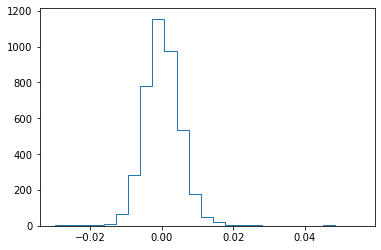

In [18]:
plt.hist(data[24].flat, bins=25, histtype='step')